# Wanda Nur Hamidah

In [1]:
#Import library
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_excel("ecommerce_churn.xlsx",index_col = 0)
data.head(3)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50027,0,8.0,Mobile Phone,3,6.0,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.0,6.0,172.95
50028,0,NaN,Phone,3,12.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Divorced,3,1,20.0,0.0,4.0,5.0,123.06
50029,0,18.0,Phone,1,NaN,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,123.48


In [3]:
data.shape

(1896, 19)

In [4]:
data.columns.values

array(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'DeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderIncreaseFromLastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

In [5]:
data.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,DeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,1896.000000,1739.000000,1896.000000,1744.000000,1766.000000,1896.000000,1896.000000,1896.000000,1896.000000,1855.000000,1817.000000,1837.000000,1812.000000,1896.000000
mean,0.500000,7.347901,1.719409,15.922018,2.682899,3.543776,3.275316,4.088080,0.385549,15.391914,1.470556,2.694066,3.786976,164.907252
std,0.500132,8.149302,0.936148,8.498368,0.679286,1.015023,1.269551,2.694888,0.486853,3.695976,1.862077,2.866878,3.540237,44.698011
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,12.000000,0.000000,1.000000,1.000000,132.940000
50%,0.500000,4.000000,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,150.870000
75%,1.000000,13.000000,3.000000,22.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,181.610000
max,1.000000,50.000000,3.000000,36.000000,4.000000,6.000000,5.000000,21.000000,1.000000,26.000000,16.000000,16.000000,46.000000,323.590000


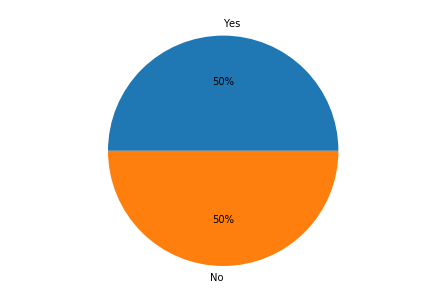

In [6]:
#memvisualisasi persentase Churn pada dataset 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
ax.axis('equal') 
labels = ['Yes','No'] 
churn = data.Churn.value_counts() 
ax.pie(churn, labels=labels, autopct='%.0f%%') 
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
#konversi semua variabel tipe non-numerikal ke tipe numerikal  
for column in data.columns:
    if data[column].dtype == np.number: continue
    #terapkan encoding pada tiap variabel non-numerikal
    data[column] = LabelEncoder().fit_transform(data[column])
print(data.describe())

             Churn       Tenure  PreferredLoginDevice     CityTier  \
count  1896.000000  1739.000000           1896.000000  1896.000000   
mean      0.500000     7.347901              1.000000     0.719409   
std       0.500132     8.149302              0.785085     0.936148   
min       0.000000     0.000000              0.000000     0.000000   
25%       0.000000     1.000000              0.000000     0.000000   
50%       0.500000     4.000000              1.000000     0.000000   
75%       1.000000    13.000000              2.000000     2.000000   
max       1.000000    50.000000              2.000000     2.000000   

       WarehouseToHome  PreferredPaymentMode       Gender  HourSpendOnApp  \
count      1744.000000           1896.000000  1896.000000     1766.000000   
mean         15.922018              3.436709     0.613397        2.682899   
std           8.498368              1.550284     0.487100        0.679286   
min           5.000000              0.000000     0.000000    

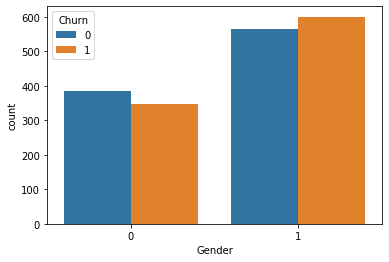

In [8]:
#Visualisasi churn dengan Males dan Females
sns.countplot(x='Gender', hue='Churn',data = data)

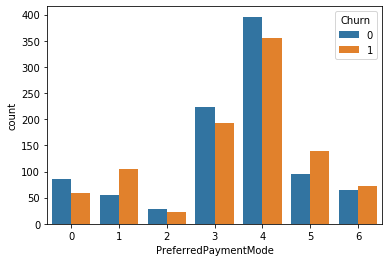

In [9]:
#Visualisasi churn dengan PreferredPaymentMode
sns.countplot(x='PreferredPaymentMode', hue='Churn',data = data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 50027 to 55622
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      1896 non-null   int64  
 1   Tenure                     1739 non-null   float64
 2   PreferredLoginDevice       1896 non-null   int32  
 3   CityTier                   1896 non-null   int64  
 4   WarehouseToHome            1744 non-null   float64
 5   PreferredPaymentMode       1896 non-null   int32  
 6   Gender                     1896 non-null   int32  
 7   HourSpendOnApp             1766 non-null   float64
 8   DeviceRegistered           1896 non-null   int64  
 9   PreferedOrderCat           1896 non-null   int32  
 10  SatisfactionScore          1896 non-null   int64  
 11  MaritalStatus              1896 non-null   int32  
 12  NumberOfAddress            1896 non-null   int64  
 13  Complain                   1896 non-null   

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['Tenure','WarehouseToHome','HourSpendOnApp','OrderIncreaseFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder']])
data[['Tenure','WarehouseToHome','HourSpendOnApp','OrderIncreaseFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder']] = imputer.transform(data[['Tenure','WarehouseToHome','HourSpendOnApp','OrderIncreaseFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder']])
data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50027,0,8.000000,1,2,6.000000,5,1,3.0,2,0,3,0,1,0,13.0,1.0,1.000000,6.0,172.95
50028,0,7.347901,2,2,12.000000,5,1,2.0,2,2,2,0,2,1,20.0,0.0,4.000000,5.0,123.06
50029,0,18.000000,2,0,15.922018,4,1,2.0,2,2,3,1,8,0,18.0,1.0,1.000000,15.0,123.48
50030,0,5.000000,0,2,14.000000,5,0,2.0,2,0,1,2,1,0,14.0,2.0,3.000000,7.0,189.98
50031,0,2.000000,0,0,6.000000,1,1,2.0,2,2,2,0,1,0,13.0,0.0,1.000000,9.0,143.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55599,1,1.000000,0,2,16.000000,5,1,3.0,3,4,4,1,2,0,20.0,2.0,2.000000,1.0,142.90
55603,1,1.000000,1,0,8.000000,3,1,3.0,3,4,0,1,10,1,15.0,3.0,3.000000,3.0,172.87
55605,1,20.000000,2,0,14.000000,1,1,4.0,3,4,2,1,9,0,12.0,7.0,10.000000,9.0,148.39


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 50027 to 55622
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      1896 non-null   int64  
 1   Tenure                     1896 non-null   float64
 2   PreferredLoginDevice       1896 non-null   int32  
 3   CityTier                   1896 non-null   int64  
 4   WarehouseToHome            1896 non-null   float64
 5   PreferredPaymentMode       1896 non-null   int32  
 6   Gender                     1896 non-null   int32  
 7   HourSpendOnApp             1896 non-null   float64
 8   DeviceRegistered           1896 non-null   int64  
 9   PreferedOrderCat           1896 non-null   int32  
 10  SatisfactionScore          1896 non-null   int64  
 11  MaritalStatus              1896 non-null   int32  
 12  NumberOfAddress            1896 non-null   int64  
 13  Complain                   1896 non-null   

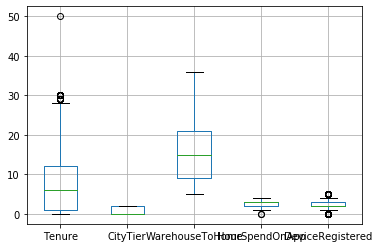

In [13]:
data.boxplot(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'DeviceRegistered'])

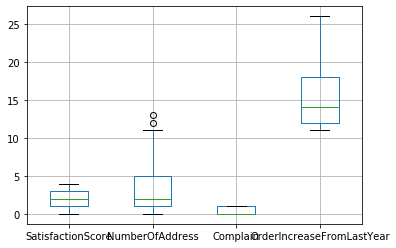

In [14]:
data.boxplot(['SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderIncreaseFromLastYear'])

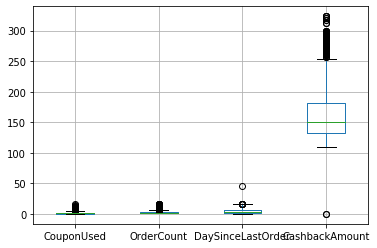

In [15]:
data.boxplot(['CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']) 

In [16]:
import numpy as np
from scipy import stats

z = np.abs(stats.zscore(data._get_numeric_data()))
outlier = data[(z < 3).all(axis = 1)]
print(outlier.shape)

(1784, 19)


In [17]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], data.shape[0]-outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,1784
1,Outlier,112


In [18]:
from sklearn import preprocessing

features = data.iloc[:,1:19]
features_normalized = preprocessing.normalize(features, norm='l2')
features_normalized = pd.DataFrame(features_normalized, columns = features.columns.tolist())
features_normalized

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0.045980,0.005747,0.011495,0.034485,0.028737,0.005747,0.017242,0.011495,0.000000,0.017242,0.000000,0.005747,0.000000,0.074717,0.005747,0.005747,0.034485,0.994020
1,0.058387,0.015892,0.015892,0.095353,0.039730,0.007946,0.015892,0.015892,0.015892,0.015892,0.000000,0.015892,0.007946,0.158922,0.000000,0.031784,0.039730,0.977845
2,0.140203,0.015578,0.000000,0.124017,0.031156,0.007789,0.015578,0.015578,0.015578,0.023367,0.007789,0.062312,0.000000,0.140203,0.007789,0.007789,0.116836,0.961791
3,0.026130,0.000000,0.010452,0.073165,0.026130,0.000000,0.010452,0.010452,0.000000,0.005226,0.010452,0.005226,0.000000,0.073165,0.010452,0.015678,0.036582,0.992846
4,0.013863,0.000000,0.000000,0.041589,0.006932,0.006932,0.013863,0.013863,0.013863,0.013863,0.000000,0.006932,0.000000,0.090110,0.000000,0.006932,0.062384,0.992525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,0.006873,0.000000,0.013745,0.109963,0.034363,0.006873,0.020618,0.020618,0.027491,0.027491,0.006873,0.013745,0.000000,0.137453,0.013745,0.013745,0.006873,0.982104
1892,0.005740,0.005740,0.000000,0.045922,0.017221,0.005740,0.017221,0.017221,0.022961,0.000000,0.005740,0.057403,0.005740,0.086105,0.017221,0.017221,0.017221,0.992326
1893,0.131526,0.013153,0.000000,0.092068,0.006576,0.006576,0.026305,0.019729,0.026305,0.013153,0.006576,0.059187,0.000000,0.078916,0.046034,0.065763,0.059187,0.975857
1894,0.072265,0.000000,0.010324,0.041294,0.020647,0.005162,0.020647,0.015485,0.010324,0.010324,0.005162,0.041294,0.000000,0.067103,0.010324,0.010324,0.010324,0.992512


In [19]:
z = np.abs(stats.zscore(features_normalized._get_numeric_data()))
outlier = features_normalized[(z < 3).all(axis = 1)]
print(outlier.shape)

(1785, 18)


In [20]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], features_normalized.shape[0]-outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,1785
1,Outlier,111


In [21]:
data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50027,0,8.000000,1,2,6.000000,5,1,3.0,2,0,3,0,1,0,13.0,1.0,1.000000,6.0,172.95
50028,0,7.347901,2,2,12.000000,5,1,2.0,2,2,2,0,2,1,20.0,0.0,4.000000,5.0,123.06
50029,0,18.000000,2,0,15.922018,4,1,2.0,2,2,3,1,8,0,18.0,1.0,1.000000,15.0,123.48
50030,0,5.000000,0,2,14.000000,5,0,2.0,2,0,1,2,1,0,14.0,2.0,3.000000,7.0,189.98
50031,0,2.000000,0,0,6.000000,1,1,2.0,2,2,2,0,1,0,13.0,0.0,1.000000,9.0,143.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55599,1,1.000000,0,2,16.000000,5,1,3.0,3,4,4,1,2,0,20.0,2.0,2.000000,1.0,142.90
55603,1,1.000000,1,0,8.000000,3,1,3.0,3,4,0,1,10,1,15.0,3.0,3.000000,3.0,172.87
55605,1,20.000000,2,0,14.000000,1,1,4.0,3,4,2,1,9,0,12.0,7.0,10.000000,9.0,148.39


## Splitting

In [22]:
from sklearn.model_selection import train_test_split
# Predictor -> X dan target -> y
X = data.drop('Churn', axis = 1)
y = data['Churn']
# Splitting data train dan data test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print deskripsi
print('Jumlah baris dan kolom dari x_train adalah: ', x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah:  (1327, 18) , sedangkan Jumlah baris dan kolom dari y_train adalah: (1327,)
Persentase Churn di data Training adalah:
1    0.50113
0    0.49887
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (569, 18) , sedangkan Jumlah baris dan kolom dari y_test adalah: (569,)
Persentase Churn di data Testing adalah:
0    0.502636
1    0.497364
Name: Churn, dtype: float64


## Regresi Logistik

In [23]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression().fit(x_train, y_train) 
print('Model Logistic Regression yang terbentuk adalah: \n',log_model)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [24]:
#Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       662
           1       0.81      0.84      0.82       665

    accuracy                           0.82      1327
   macro avg       0.82      0.82      0.82      1327
weighted avg       0.82      0.82      0.82      1327



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[535, 127],
       [109, 556]], dtype=int64)

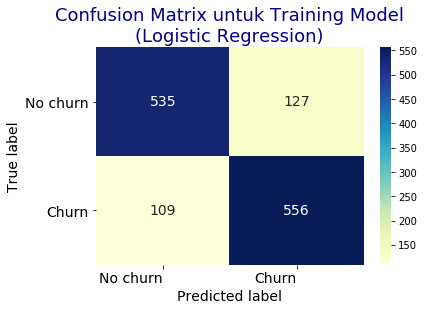

In [26]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [27]:
#Menampilkan hasil testing model dengan confusion matrix
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       286
           1       0.80      0.82      0.81       283

    accuracy                           0.81       569
   macro avg       0.81      0.81      0.81       569
weighted avg       0.81      0.81      0.81       569



In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[229,  57],
       [ 51, 232]], dtype=int64)

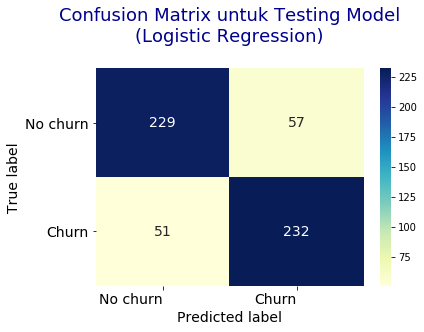

In [29]:
#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
#Latih model dengan RandomForestClassifier()
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [31]:
#Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y_train_pred = rdf_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      1.00      1.00       665

    accuracy                           1.00      1327
   macro avg       1.00      1.00      1.00      1327
weighted avg       1.00      1.00      1.00      1327



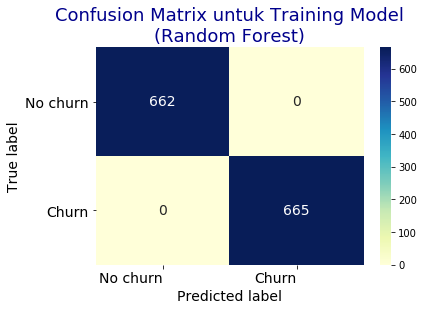

In [32]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [33]:
#Menampilkan hasil testing model dengan confusion matrix
#Predict 
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest):') 
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       286
           1       0.91      0.94      0.92       283

    accuracy                           0.92       569
   macro avg       0.92      0.92      0.92       569
weighted avg       0.92      0.92      0.92       569



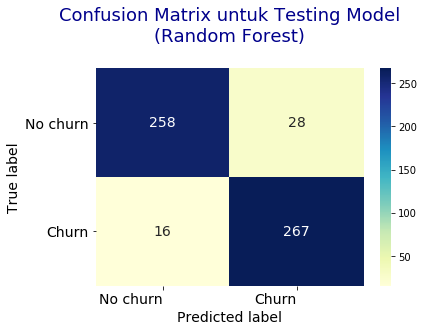

In [34]:
#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()